# The central dogma

## Equations

## Numerical simulation first model

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Initial conditions
M_0 = 0
P_0 = 0
Km = 1
Kp = 1
dm = 1
dp = 1
a = 0.5
T_0 = 1
D_0 = 1

total_time = 10
dt = 0.1

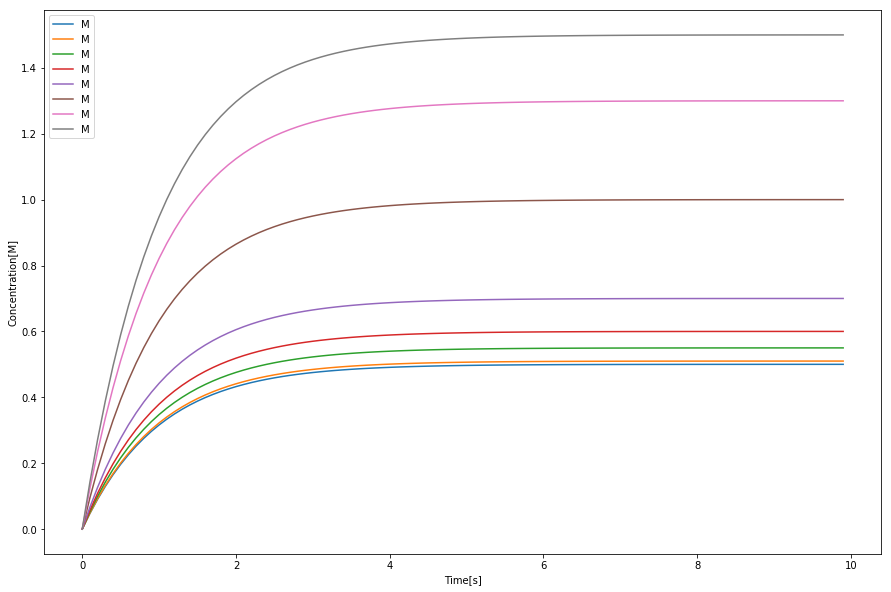

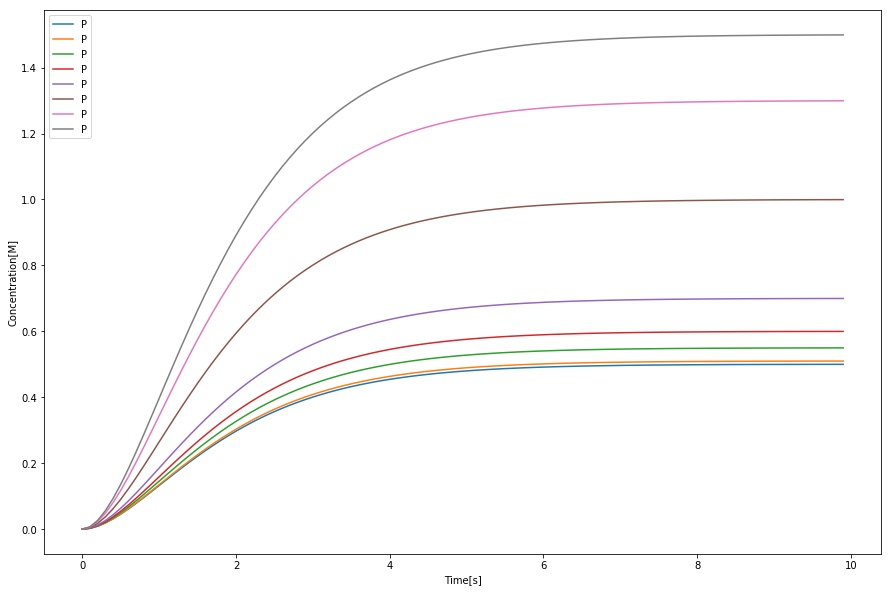

In [40]:
# M = mRNA
# D = DNA
# P = protein
# T = transcription factor
# Km = rate of mRNA production
# Kp = rate of protein production
# dm = rate of mRNA degradation
# dp = rate of protein degradation
# a = promoter leaking

# T + D -Km-> M + T + D, T is not consumed and nor DNA
# M -Kp-> P + M, not being consumed
# M -dm-> 0
# P -dp-> 0
# 0 -a-> M

def modelD(y, t, Km, Kp, dm, dp, a, T_0, D_0):
    [M, P] = y
    dMdt = Km*T_0*D_0 - dm*M + a
    dPdt = Kp*M - dp*P
    
    dydt = [dMdt, dPdt]
    return dydt

def hill(T, K, n):
    return T**n/(K**n + T**n)
    
def modelDH(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n):
    [M, P] = y
    dMdt = Km*hill(T_0, K, n)*D_0 - dm*M + a
    dPdt = Kp*M - dp*P
    
    dydt = [dMdt, dPdt]
    return dydt

def plot_model(y, t, Km, Kp, dm, dp, a, T_0, D_0, n, plot_M=True, plot_P=True): 
    # initial condition
    y0 = [M_0, P_0]

    # time points
    t = np.arange(0, total_time, dt)

    # solve ODE
    y = odeint(modelD, y0, t, args=(Km, Kp, dm, dp, a, T_0, D_0))


    # plot results
    if plot_M: plt.plot(t, y[:,0], label = "M")
    if plot_P: plt.plot(t, y[:,1], label = "P")

    plt.xlabel("Time[s]")
    plt.ylabel("Concentration[M]")
    plt.legend(loc = "best")
   
plt.figure(figsize=(15,10))   
for T_0 in [0.0001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0]:
    plot_model(y, t, Km, Kp, dm, dp, a, T_0, D_0, n, plot_P=False)

plt.show()

plt.figure(figsize=(15,10))   
for T_0 in [0.0001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0]:
    plot_model(y, t, Km, Kp, dm, dp, a, T_0, D_0, n, plot_M=False)

plt.show()

## Hill function for activators

New activation equation for $D_i$ to $D_a$ (see python comments)

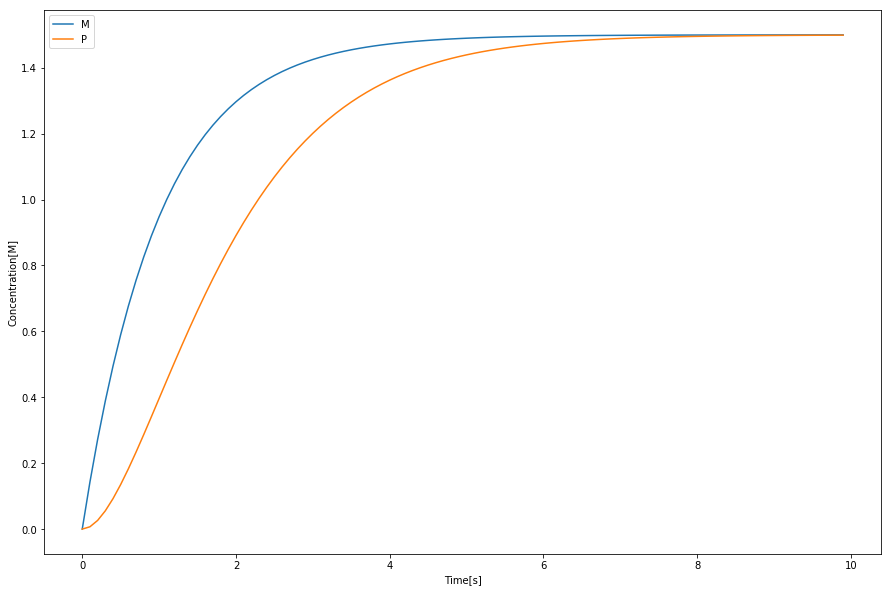

In [56]:
# M = mRNA
# D = DNA
# P = protein
# T = transcription factor
# Km = rate of mRNA production
# Kp = rate of protein production
# dm = rate of mRNA degradation
# dp = rate of protein degradation
# a = promoter leaking

# T + D -Km-> M + T + D, T is not consumed and nor DNA
# M -Kp-> P + M, not being consumed
# M -dm-> 0
# P -dp-> 0
# 0 -a-> M

# Activation of DNA with n T
# Di + nT <-K1/K2->  K1 * Di * T**n = K2 * Da => Di * T**n = Kd * Di, where Kd = K1/K2
# Dt = Di + Da
# so
# Da/Dt = T**n/(Kd(1+Da/Di))

# Da/Dt = T**n/(K**n + T**n)

K = 2
n = 5
def hill(T, K, n):
    return T**n/(K**n + T**n)
    
def modelDH(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n):
    [M, P] = y
    dMdt = Km*hill(T_0, K, n)*D_0 - dm*M + a
    dPdt = Kp*M - dp*P
    
    dydt = [dMdt, dPdt]
    return dydt

# initial condition
y0 = [M_0, P_0]

# time points
t = np.arange(0, total_time, dt)

# solve ODE
y = odeint(modelDH, y0, t, args=(Km, Kp, dm, dp, a, T_0, D_0, K, n))

plt.figure(figsize=(15,10))

# plot results
plt.plot(t, y[:,0], label = "M")
plt.plot(t, y[:,1], label = "P")

plt.xlabel("Time[s]")
plt.ylabel("Concentration[M]")
plt.legend(loc = "best")
plt.show()

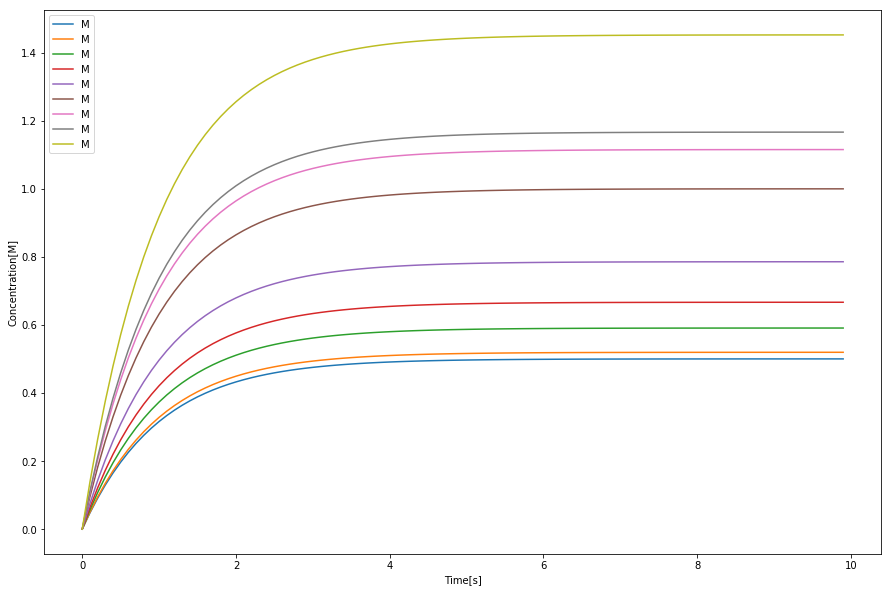

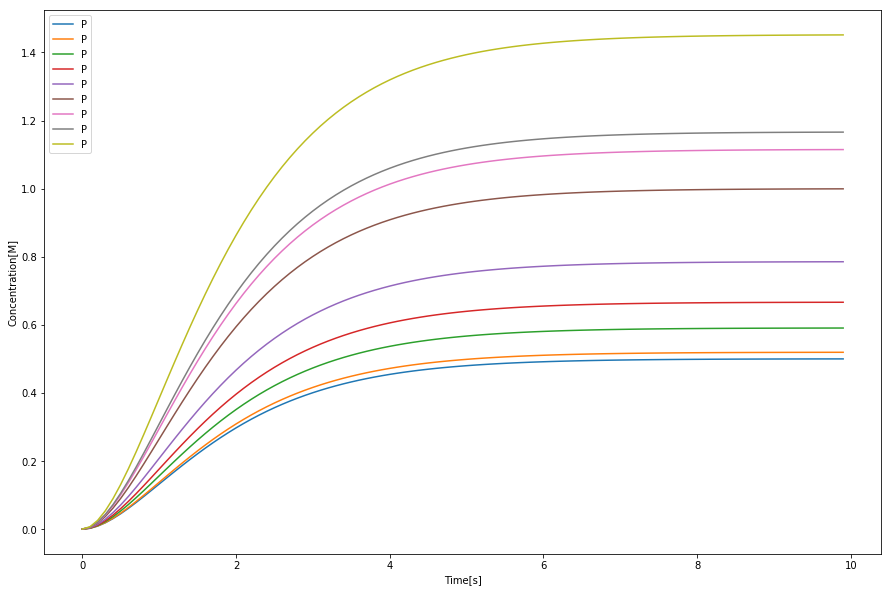

In [60]:
n = 1
def plot_modelDH(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n, plot_M=True, plot_P=True): 
    # initial condition
    y0 = [M_0, P_0]

    # time points
    t = np.arange(0, total_time, dt)

    # solve ODE
    y = odeint(modelDH, y0, t, args=(Km, Kp, dm, dp, a, T_0, D_0, K, n))


    # plot results
    if plot_M: plt.plot(t, y[:,0], label = "M")
    if plot_P: plt.plot(t, y[:,1], label = "P")

    plt.xlabel("Time[s]")
    plt.ylabel("Concentration[M]")
    plt.legend(loc = "best")
   
plt.figure(figsize=(15,10))   
for T_0 in [0.0001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 10]:
    plot_modelDH(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n, plot_P=False)

plt.show()

plt.figure(figsize=(15,10))   
for T_0 in [0.0001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 10]:
    plot_modelDH(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n, plot_M=False)

plt.show()

## Hill function for repressors

New repression equation for $D_a$ to $D_i$ (see python comments)

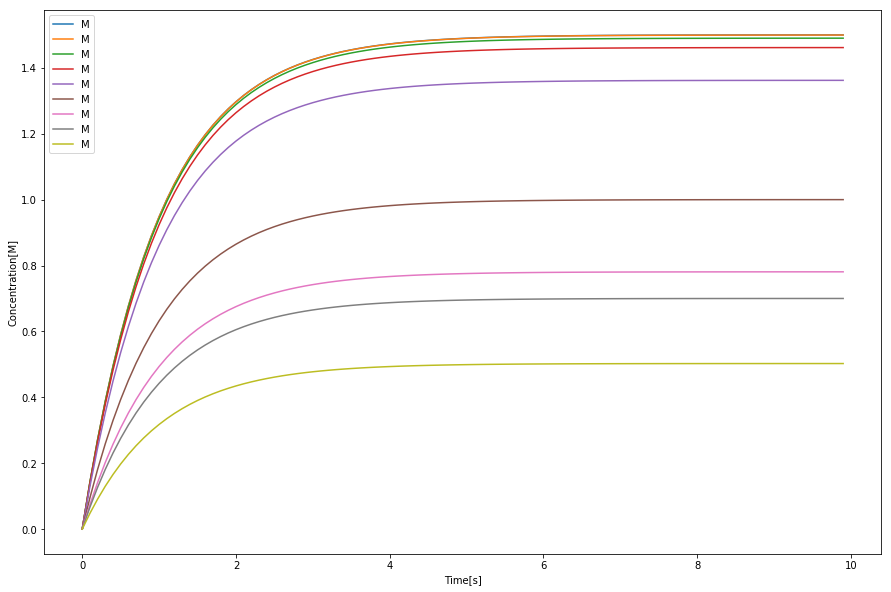

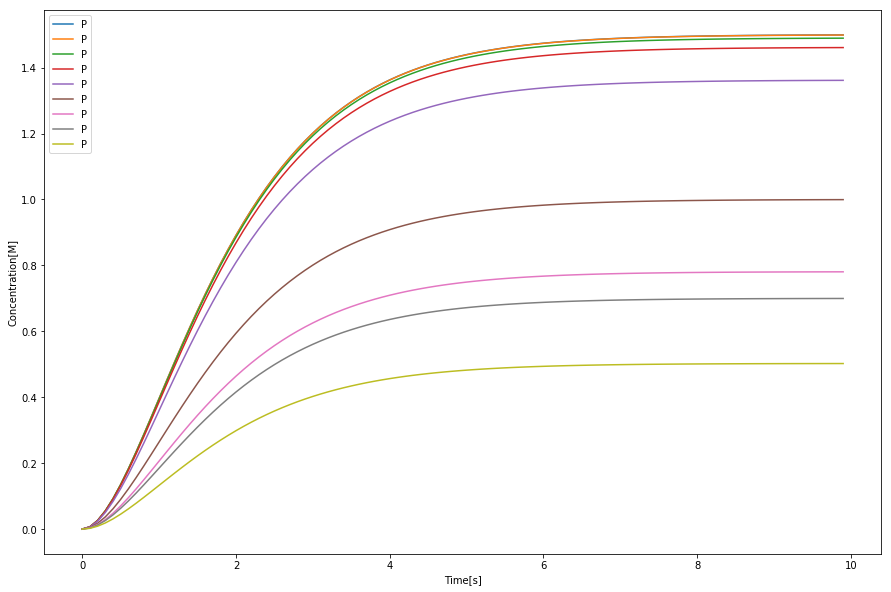

In [59]:
# M = mRNA
# D = DNA
# P = protein
# T = transcription factor
# Km = rate of mRNA production
# Kp = rate of protein production
# dm = rate of mRNA degradation
# dp = rate of protein degradation
# a = promoter leaking

# T + D -Km-> M + T + D, T is not consumed and nor DNA
# M -Kp-> P + M, not being consumed
# M -dm-> 0
# P -dp-> 0
# 0 -a-> M

# Da + nT <-K1/K2->  Di
# implies Da/Di = K**d/(T**n + K**n)

n = 2
K = 1
def hill_repress(T, K, n):
    return K**n/(K**n + T**n)
    
def modelDHR(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n):
    [M, P] = y
    dMdt = Km*hill_repress(T_0, K, n)*D_0 - dm*M + a
    dPdt = Kp*M - dp*P
    
    dydt = [dMdt, dPdt]
    return dydt

n = 2
K = 0.5
def plot_modelDHR(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n, plot_M=True, plot_P=True): 
    # initial condition
    y0 = [M_0, P_0]

    # time points
    t = np.arange(0, total_time, dt)

    # solve ODE
    y = odeint(modelDHR, y0, t, args=(Km, Kp, dm, dp, a, T_0, D_0, K, n))


    # plot results
    if plot_M: plt.plot(t, y[:,0], label = "M")
    if plot_P: plt.plot(t, y[:,1], label = "P")

    plt.xlabel("Time[s]")
    plt.ylabel("Concentration[M]")
    plt.legend(loc = "best")
   

plt.figure(figsize=(15,10))   
for T_0 in [0.0001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 10]:
    plot_modelDHR(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n, plot_P=False)

plt.show()

plt.figure(figsize=(15,10))   
for T_0 in [0.0001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 10]:
    plot_modelDHR(y, t, Km, Kp, dm, dp, a, T_0, D_0, K, n, plot_M=False)

plt.show()

## Possitive feedback

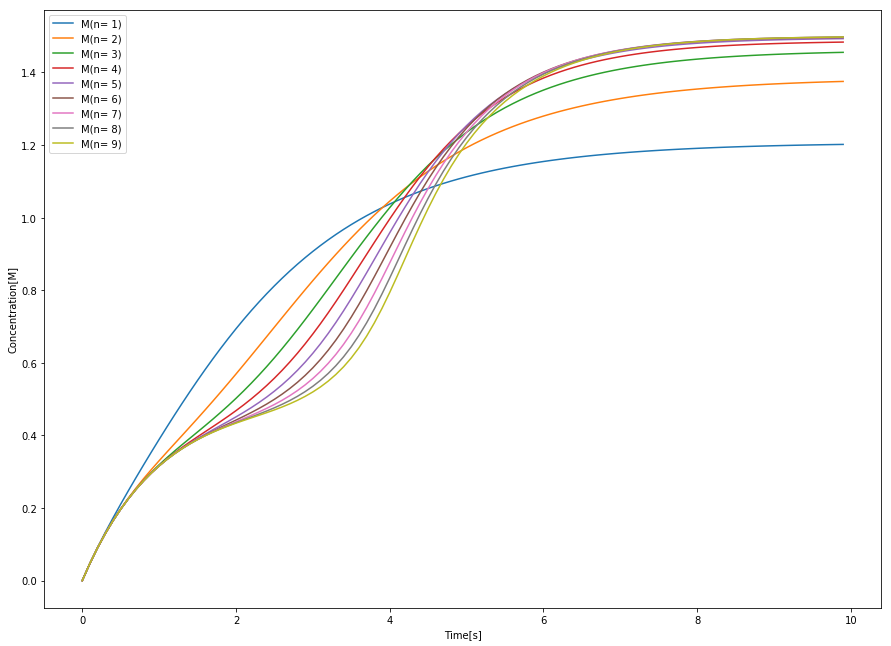

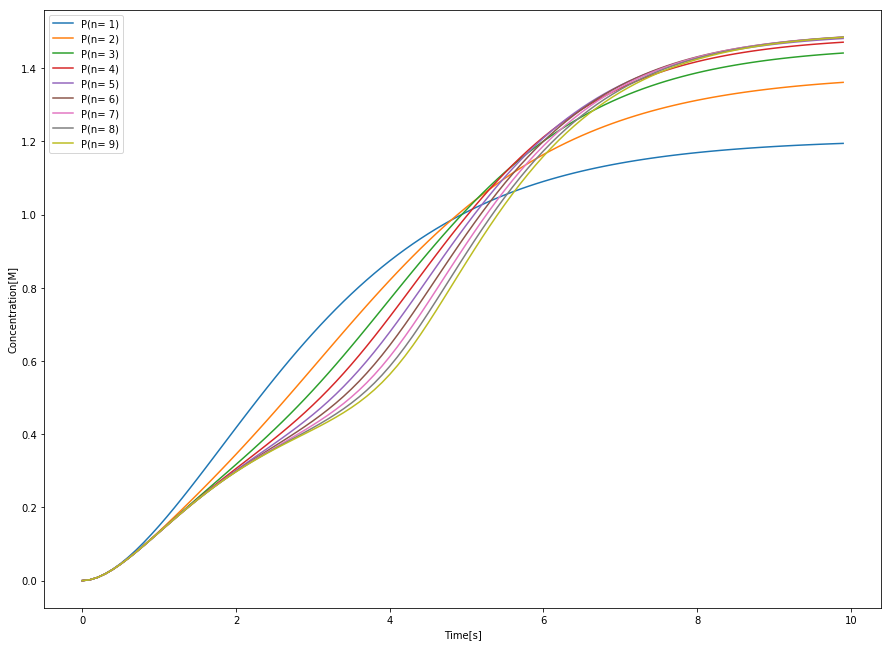

In [81]:
# M = mRNA
# D = DNA
# P = protein
# T = transcription factor
# Km = rate of mRNA production
# Kp = rate of protein production
# dm = rate of mRNA degradation
# dp = rate of protein degradation
# a = promoter leaking

# P + D -Km-> M + D, D is not consumed and nor DNA
# M -Kp-> P + M, not being consumed
# M -dm-> 0
# P -dp-> 0
# 0 -a-> M

# Da + nT <-K1/K2->  Di
# implies Da/Di = K**d/(T**n + K**n)

n = 2
K = 1

def hill(T, K, n):
    return T**n/(K**n + T**n)

def modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n):
    [M, P] = y
    dMdt = Km*hill(P, K, n)*D_0 - dm*M + a
    dPdt = Kp*M - dp*P
    
    dydt = [dMdt, dPdt]
    return dydt

K = 0.5
def plot_modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n, plot_M=True, plot_P=True): 
    # initial condition
    y0 = [M_0, P_0]

    # time points
    t = np.arange(0, total_time, dt)

    # solve ODE
    y = odeint(modelP, y0, t, args=(Km, Kp, dm, dp, a, D_0, K, n))


    # plot results
    if plot_M: plt.plot(t, y[:,0], label = "M(n= " + str(n) + ")")
    if plot_P: plt.plot(t, y[:,1], label = "P(n= " + str(n) + ")")

    plt.xlabel("Time[s]")
    plt.ylabel("Concentration[M]")
    plt.legend(loc = "best")
   

plt.figure(figsize=(15,11))   
for n in range(1,10):
    plot_modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n, plot_P=False)

plt.show()

plt.figure(figsize=(15,11))   
for n in range(1,10):
    plot_modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n, plot_M=False)

plt.show()

## Negative feedback

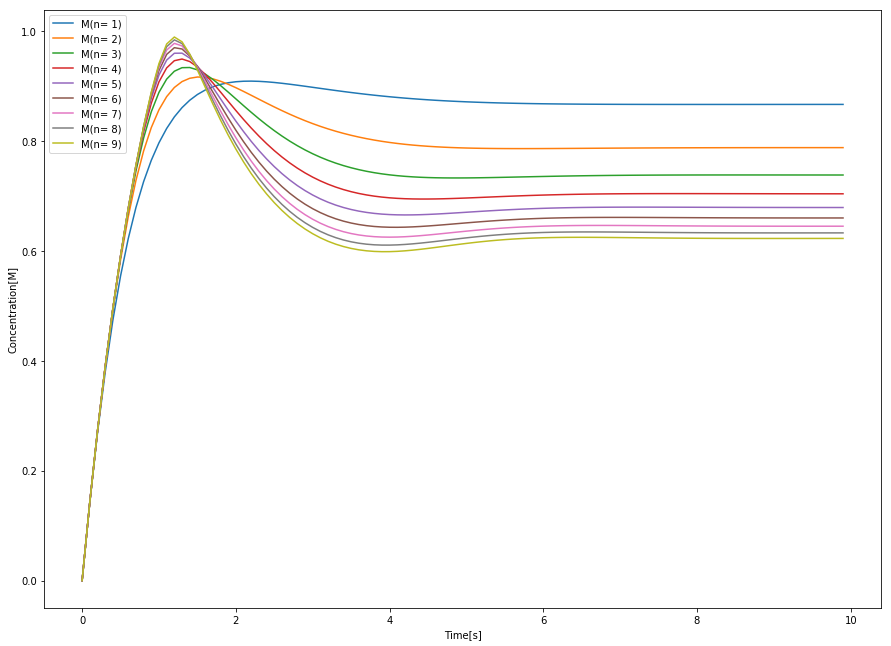

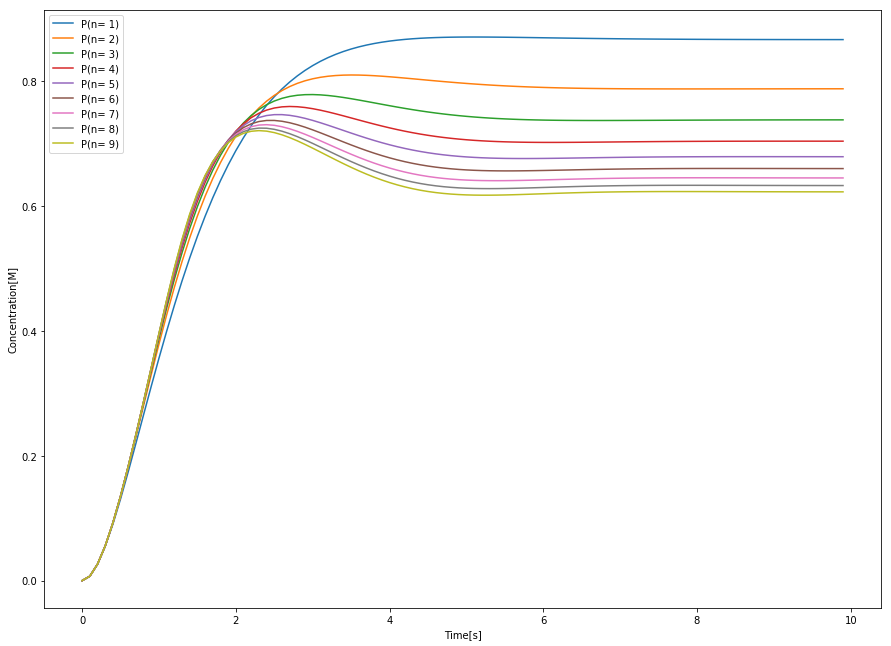

In [76]:
# M = mRNA
# D = DNA
# P = protein
# T = transcription factor
# Km = rate of mRNA production
# Kp = rate of protein production
# dm = rate of mRNA degradation
# dp = rate of protein degradation
# a = promoter leaking

# P + D -Km-> M + D, D is not consumed and nor DNA
# M -Kp-> P + M, not being consumed
# M -dm-> 0
# P -dp-> 0
# 0 -a-> M

# Da + nT <-K1/K2->  Di
# implies Da/Di = K**d/(T**n + K**n)

n = 2
K = 1

def hill(T, K, n):
    return K**n/(K**n + T**n)

def modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n):
    [M, P] = y
    dMdt = Km*hill(P, K, n)*D_0 - dm*M + a
    dPdt = Kp*M - dp*P
    
    dydt = [dMdt, dPdt]
    return dydt

K = 0.5
def plot_modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n, plot_M=True, plot_P=True): 
    # initial condition
    y0 = [M_0, P_0]

    # time points
    t = np.arange(0, total_time, dt)

    # solve ODE
    y = odeint(modelP, y0, t, args=(Km, Kp, dm, dp, a, D_0, K, n))


    # plot results
    if plot_M: plt.plot(t, y[:,0], label = "M(n= " + str(n) + ")")
    if plot_P: plt.plot(t, y[:,1], label = "P(n= " + str(n) + ")")

    plt.xlabel("Time[s]")
    plt.ylabel("Concentration[M]")
    plt.legend(loc = "best")
   

plt.figure(figsize=(15,11))   
for n in range(1,10):
    plot_modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n, plot_P=False)

plt.show()

plt.figure(figsize=(15,11))   
for n in range(1,10):
    plot_modelP(y, t, Km, Kp, dm, dp, a, D_0, K, n, plot_M=False)

plt.show()

# Outputs

In [84]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx FernandoFreire_exercise5.ipynb 1> /dev/null 2> /dev/null
/Library/TeX/texbin/pdflatex -shell-escape FernandoFreire_exercise5 1> /dev/null 2> /dev/null
jupyter nbconvert --to html_toc FernandoFreire_exercise5.ipynb 1> /dev/null 2> /dev/null